In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/adarsh/Documents/CJA_main'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/adarsh/Documents/CJA_main/Customer behaviour Tourism.csv
/Users/adarsh/Documents/CJA_main/CJA_main_ui.py
/Users/adarsh/Documents/CJA_main/CJA.ipynb
/Users/adarsh/Documents/CJA_main/.ipynb_checkpoints/CJA-checkpoint.ipynb


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'/Users/adarsh/Documents/CJA_main/Customer behaviour Tourism.csv')

In [5]:
df.head(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0.0,8.0
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3.0,12.0
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1.0,1.0
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0.0,10.0
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2.0,17.0


In [6]:
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [7]:
funnel_data = df[['UserID', 'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page', 'Taken_product']].copy()

funnel_stages = ['View Travel Page', 'Comment on Travel Page', 'Buy Product']

# Convert 'Taken_product' to binary (1 for 'Yes', 0 for 'No')
funnel_data['Buy Product'] = (funnel_data['Taken_product'] == 'Yes').astype(int)

In [8]:
# Calculate the percentage of users at each stage
funnel_data['View Travel Page'] = funnel_data['Yearly_avg_view_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)
funnel_data['Comment on Travel Page'] = funnel_data['Yearly_avg_comment_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)

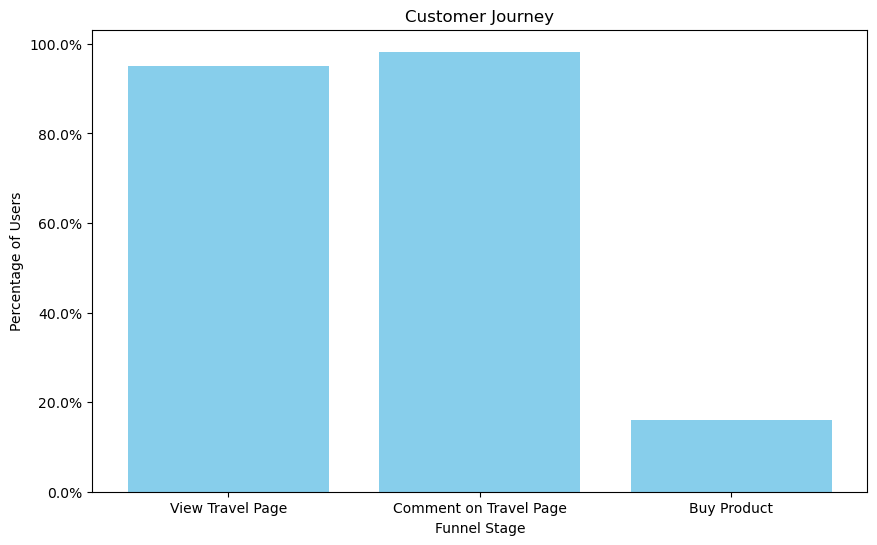

In [9]:
funnel_percentages = []
for stage in funnel_stages:
    percentage = funnel_data[stage].mean() * 100
    funnel_percentages.append(percentage)

# Funnel Visualization
plt.figure(figsize=(10, 6))
plt.bar(funnel_stages, funnel_percentages, color='skyblue')
plt.title('Customer Journey')
plt.xlabel('Funnel Stage')
plt.ylabel('Percentage of Users')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.show()

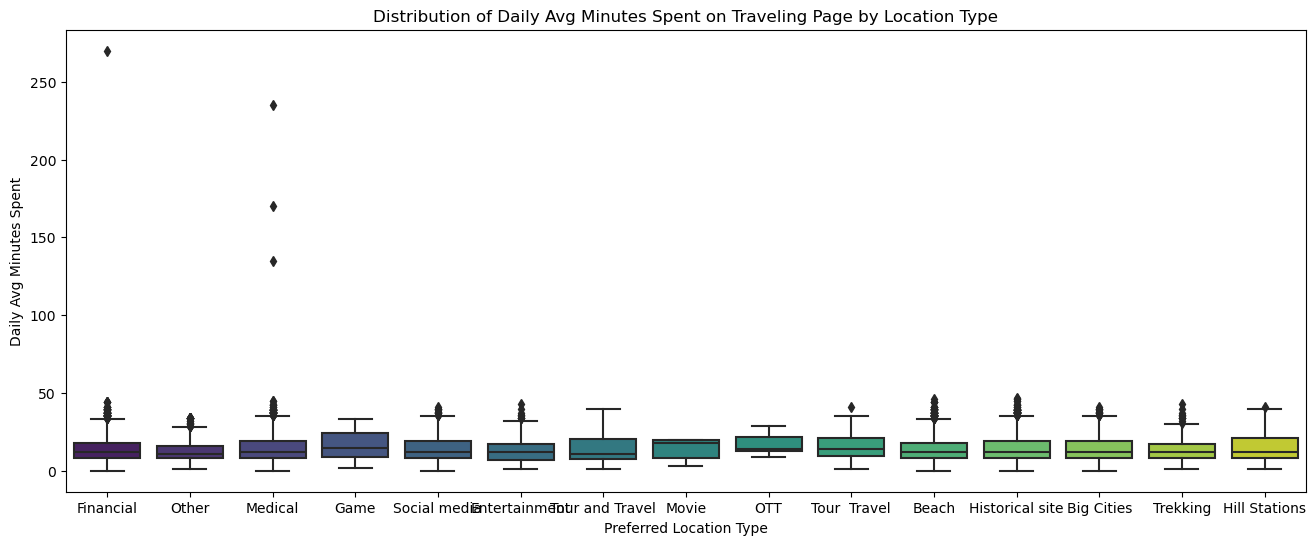

In [10]:
# Box plot to visualize the distribution of daily average minutes spent for different location types
plt.figure(figsize=(16, 6))
sns.boxplot(x='preferred_location_type', y='Daily_Avg_mins_spend_on_traveling_page', data=df, palette='viridis')
plt.title('Distribution of Daily Avg Minutes Spent on Traveling Page by Location Type')
plt.xlabel('Preferred Location Type')
plt.ylabel('Daily Avg Minutes Spent')
plt.show()

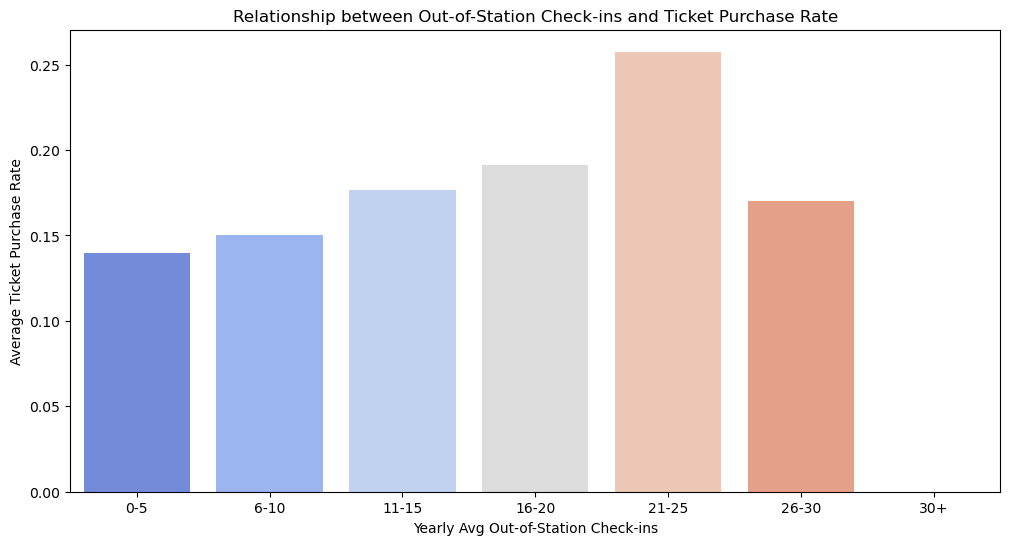

In [11]:
# Convert 'yearly_avg_Outstation_checkins' to numeric (in case it's not)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce')

# Create bins for yearly average out-of-station check-ins
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']

df['Outstation_checkin_bins'] = pd.cut(df['yearly_avg_Outstation_checkins'], bins=bins, labels=labels, right=False)

# Convert 'Taken_product' to binary (1 for 'Yes', 0 for 'No')
df['Taken_product'] = (df['Taken_product'] == 'Yes').astype(int)

# Calculate the average ticket purchase rate for each bin
purchase_rate_by_bin = df.groupby('Outstation_checkin_bins')['Taken_product'].mean()

# Bar plot to visualize the relationship between out-of-station check-ins and ticket purchase rate
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_rate_by_bin.index, y=purchase_rate_by_bin.values, palette='coolwarm')
plt.title('Relationship between Out-of-Station Check-ins and Ticket Purchase Rate')
plt.xlabel('Yearly Avg Out-of-Station Check-ins')
plt.ylabel('Average Ticket Purchase Rate')
plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
# Drop rows with missing values in the selected features
features_for_clustering = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']
df_clustering = df[features_for_clustering].dropna()

# Extract the selected features
X = df_clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

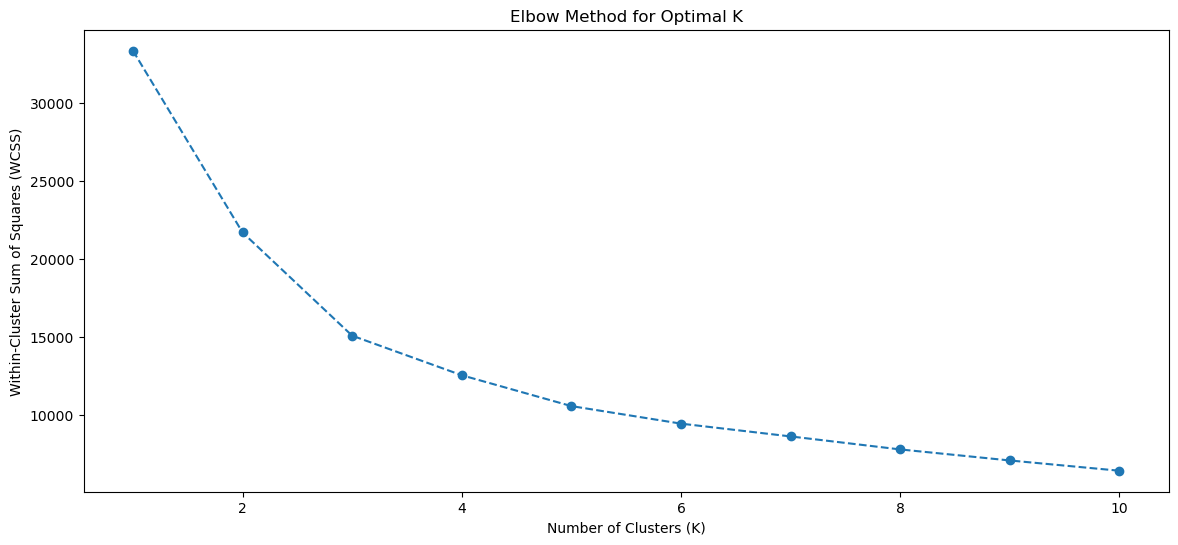

In [14]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(14, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


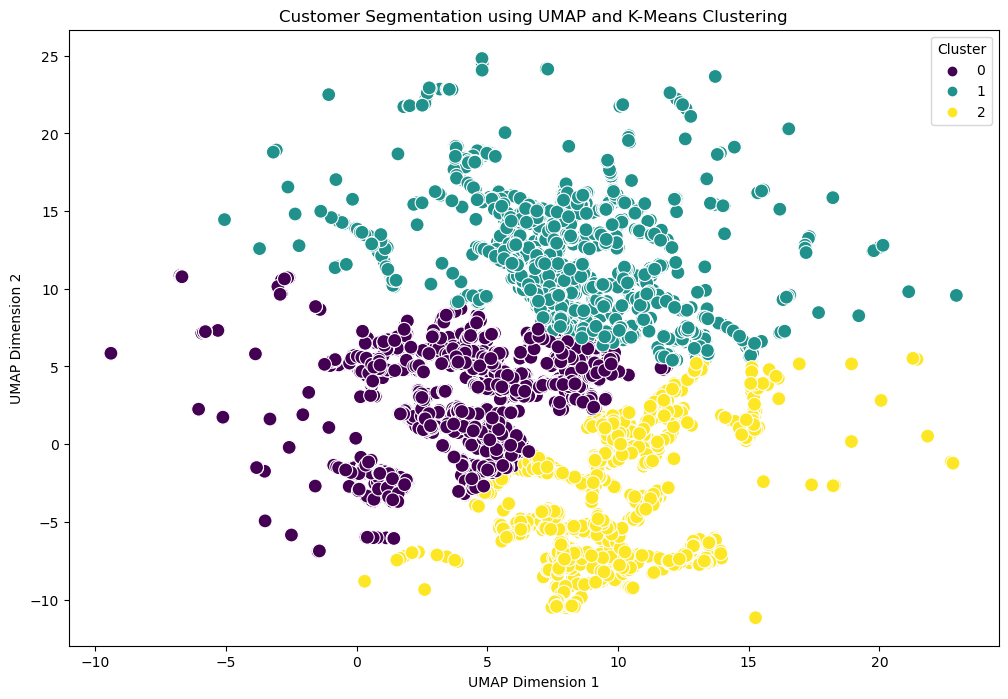

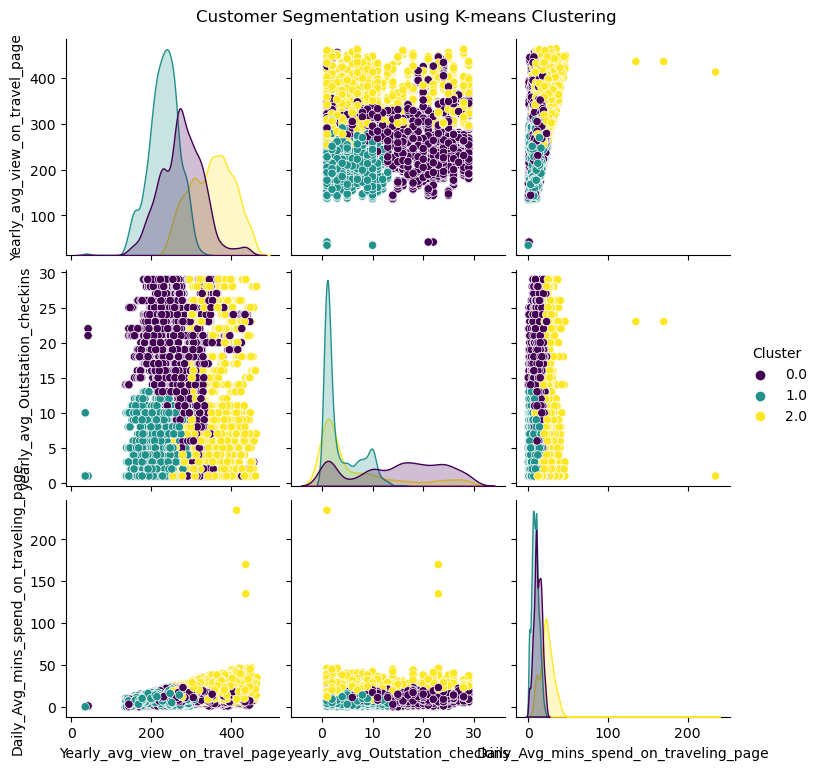

In [15]:
# Based on the Elbow Method, optimal K is 3
optimal_k = 3

# Apply K-means clustering with the optimal K
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values in the selected features
features_for_clustering = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']
df_clustering = df[features_for_clustering].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

# Apply UMAP for dimensionality reduction (reduce to 2D for visualization)
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Apply K-Means clustering on the reduced data
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Add UMAP and cluster results to the DataFrame
df_clustering['UMAP_1'] = X_umap[:, 0]
df_clustering['UMAP_2'] = X_umap[:, 1]
df_clustering['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='Cluster', palette='viridis', data=df_clustering, s=100)
plt.title('Customer Segmentation using UMAP and K-Means Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.show()

# Merge the clustering results back to the original dataframe
df = pd.merge(df, df_clustering[['Cluster']], left_index=True, right_index=True, how='left')

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', vars=features_for_clustering)
plt.suptitle('Customer Segmentation using K-means Clustering', y=1.02)
plt.show()

In [16]:
# Streamlit UI for Customer Journey Analysis with UMAP and K-Means Clustering

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

# Streamlit app title
st.title("Customer Journey Analysis Using Clustering and Dimensionality Reduction")

# Upload CSV file
uploaded_file = st.file_uploader("Upload Customer Behavior CSV", type=["csv"])

if uploaded_file is not None:
    # Load CSV into DataFrame
    df = pd.read_csv(uploaded_file)
    st.write("### Preview of Uploaded Dataset:")
    st.write(df.head())

    # Select features for clustering
    st.write("### Select Features for Clustering:")
    features = st.multiselect("Choose features", df.columns, default=['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page'])

    if features:
        # Preprocess data
        df_clustering = df[features].dropna()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_clustering)

        # UMAP for dimensionality reduction
        st.write("### UMAP Dimensionality Reduction")
        n_neighbors = st.slider("Select UMAP Neighbors", 5, 50, 15)
        umap = UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
        X_umap = umap.fit_transform(X_scaled)
        df_clustering['UMAP_1'] = X_umap[:, 0]
        df_clustering['UMAP_2'] = X_umap[:, 1]

        # Optimal number of clusters
        st.write("### K-Means Clustering")
        k = st.slider("Select Number of Clusters (K)", 2, 10, 3)
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        df_clustering['Cluster'] = kmeans.fit_predict(X_umap)

        # Visualization
        st.write("### Cluster Visualization")
        fig, ax = plt.subplots(figsize=(12, 8))
        sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='Cluster', data=df_clustering, palette='viridis', s=100, ax=ax)
        plt.title('Customer Segmentation using UMAP and K-Means Clustering')
        plt.xlabel('UMAP Dimension 1')
        plt.ylabel('UMAP Dimension 2')
        st.pyplot(fig)

        # Display results
        st.write("### Clustered Dataset")
        st.write(df_clustering.head())

        # Download option
        st.write("### Download Clustered Results")
        csv = df_clustering.to_csv(index=False).encode('utf-8')
        st.download_button("Download CSV", csv, "clustered_customer_journey.csv", "text/csv")
else:
    st.write("Upload a CSV file to start the analysis.")


2025-02-25 15:30:51.459 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 15:30:51.590 
  command:

    streamlit run /opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-02-25 15:30:51.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 15:30:51.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 15:30:51.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 15:30:51.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 15:30:51.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 15:30:51.591 Thread 'MainThread': m

In [17]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [18]:
streamlit run CJA_main_ui.py

SyntaxError: invalid syntax (1133703323.py, line 1)